In [2]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

In [5]:
df = pd.DataFrame(iris.data , columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

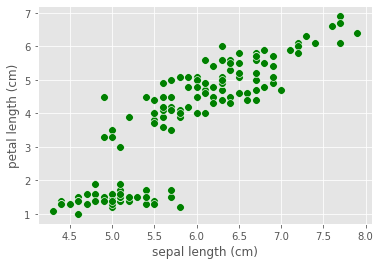

In [9]:
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', 
                data=df, s=60, color='green')

In [11]:
x = df[['sepal length (cm)', 'petal length (cm)']].values


In [12]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters=3,random_state=42)
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [16]:
centroids = model.cluster_centers_
centroids

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49215686],
       [5.87413793, 4.39310345]])

In [17]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

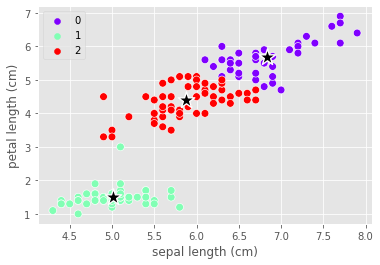

In [19]:
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)',data=df,s=60,hue=model.labels_,palette='rainbow')
sns.scatterplot(x=centroids[:,0],y=centroids[:,1],marker='*',s=300,color='black')

 # Finding the Optimal Number of Clusters

## The Elbow Method

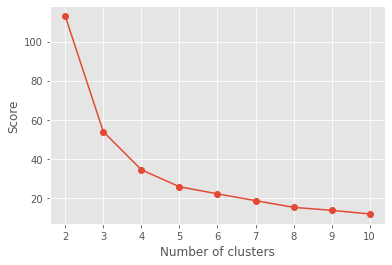

In [20]:
score = []

for k in range(2,11):
    kmeans_model = KMeans(n_clusters=k,random_state=42)
    kmeans_model.fit(x)
    score.append(kmeans_model.inertia_)

plt.plot(range(2,11),score,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

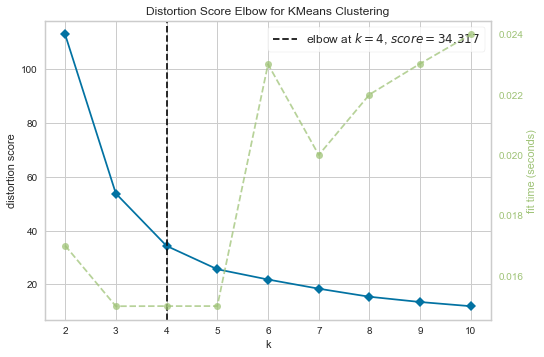

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from yellowbrick.cluster import KElbowVisualizer

visualizer3 = KElbowVisualizer(KMeans(), k=(2,11))

visualizer3.fit(x) # Fit the data to the visualizer
visualizer3.show()

## The Silhouette Score

In [30]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2,11):
    model2 = KMeans(n_clusters=k,random_state=42)
    model2.fit(x)
    score2 = silhouette_score(x,model2.labels_)
    print('Silhouette score for k ',k,'is',score2)
    silhouette_scores.append(score2)

Silhouette score for k  2 is 0.7097529826994816
Silhouette score for k  3 is 0.5890584158017611
Silhouette score for k  4 is 0.5645593160995663
Silhouette score for k  5 is 0.5577931215347036
Silhouette score for k  6 is 0.41177757163941237
Silhouette score for k  7 is 0.40668478139262904
Silhouette score for k  8 is 0.41383464955438437
Silhouette score for k  9 is 0.39620674415596785
Silhouette score for k  10 is 0.4292093502645689


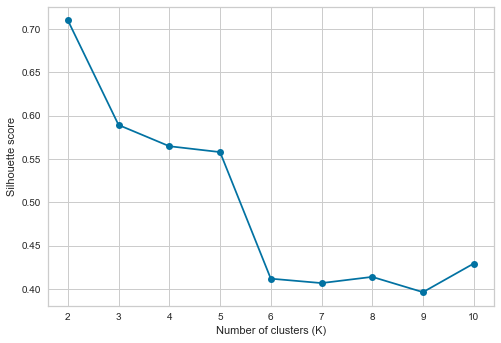

In [31]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.show()

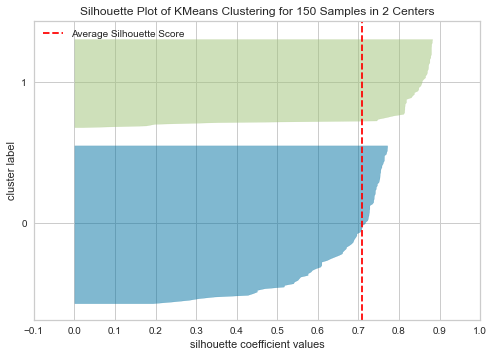

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
from yellowbrick.cluster import SilhouetteVisualizer

model_k_2 = KMeans(n_clusters=2,random_state=42)
visualizer_k_2 = SilhouetteVisualizer(model_k_2,colors='yellowbrick')
visualizer_k_2.fit(x)

visualizer_k_2.show()

### The silhouette diagram for k=2 shows that the data is split into two clusters of unequal size. This is because the widths of the two shapes are significantly different. But, most of the points in the two clusters have large silhouette values (0.75 or greater) and extend beyond the dashed line, to the right, indicating that the clusters are well separated. I do not choose k=2 as the optimal number of clusters because of unequal clusters. [Remember the assumption: the clusters are balanced (i.e., have roughly the same number of observations).]

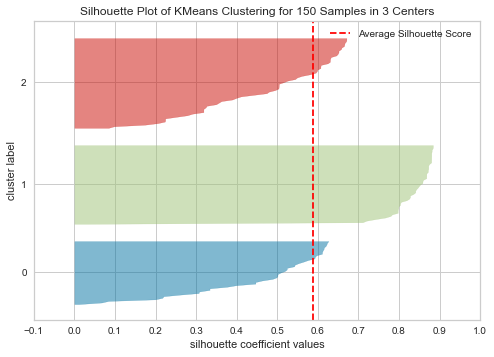

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
model_k_3 = KMeans(n_clusters=3,random_state=42)
visualizer_k_3 = SilhouetteVisualizer(model_k_3,colors='yellowbrick')
visualizer_k_3.fit(x)

visualizer_k_3.show()

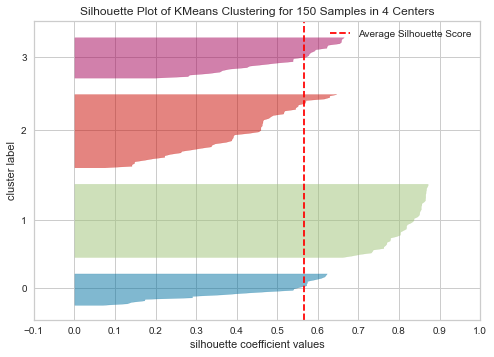

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
model_k_4 = KMeans(n_clusters=4,random_state=42)
visualizer_k_4 = SilhouetteVisualizer(model_k_4,colors='yellowbrick')
visualizer_k_4.fit(x)

visualizer_k_4.show()

### When k=3 and k=4, both diagrams show that the clusters are well separated since most instances extend beyond the dashed line and have a silhouette score closer to 0.6. When k=4, widths of the four shapes are significantly different and clusters are unbalanced.

### It seems like a good idea to use k=3 to get clusters of similar sizes, even though the overall silhouette score for k=2 is slightly greater than for k=3